In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
dataframe = pd.read_csv("marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep="\t")
dataframe.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [3]:
dataframe.shape

(5000, 32)

In [4]:
dataframe.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [5]:
df = dataframe[["Uniq Id", "Product Id", "Product Category", "Product Brand", "Product Name", "Product Description", "Product Price", "Product Image Url", "Product Tags", "Product Rating", "Product Reviews Count"]]
df.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Price,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0


In [6]:
df.shape

(5000, 11)

In [7]:
df.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category           10
Product Brand              13
Product Name                0
Product Description      1127
Product Price              42
Product Image Url           0
Product Tags                0
Product Rating           2806
Product Reviews Count    1654
dtype: int64

In [8]:
# Filling the missing values
df["Product Rating"].fillna(0, inplace=True)
df["Product Category"].fillna("", inplace=True)
df["Product Brand"].fillna("", inplace=True)
df["Product Description"].fillna("", inplace=True)
df["Product Reviews Count"].fillna(0, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\1690738160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product Rating"].fillna(0, inplace=True)
C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\1690738160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product Category"].fillna("", inplace=True)
C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\1690738160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pro

In [9]:
df.dropna(axis=0, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\2089189907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [10]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Description      0
Product Price            0
Product Image Url        0
Product Tags             0
Product Rating           0
Product Reviews Count    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# give simple names to columns
column_name = {
    "Uniq Id": "ID",
    "Product Id": "ProdID",
    "Product Rating": "Rating",
    "Product Reviews Count": "ReviewCount",
    "Product Category": "Category",
    "Product Brand": "Brand",
    "Product Name": "Name",
    "Product Image Url": "ImageURL",
    "Product Description": "Description",
    "Product Price": "Price",
    "Product Tags": "Tags"
}

In [13]:
# Rename the columns
df.rename(columns=column_name, inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\3881339913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_name, inplace=True)


In [14]:
df.head()

,ID,ProdID,Category,Brand,Name,Description,Price,ImageURL,Tags,Rating,ReviewCount
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


In [15]:
# Converting ID and ProdID to int
df["ID"] = df["ID"].str.extract(r'(\d+)').astype(float)
df["ProdID"] = df["ProdID"].str.extract(r'(\d+)').astype(float)

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\866191633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"] = df["ID"].str.extract(r'(\d+)').astype(float)
C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\866191633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ProdID"] = df["ProdID"].str.extract(r'(\d+)').astype(float)


In [16]:
df.head()

,ID,ProdID,Category,Brand,Name,Description,Price,ImageURL,Tags,Rating,ReviewCount
0,1.705737e+09,2.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,9.500000e+01,76.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8.000000e+00,8.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,4.000000e+00,3.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,9.900000e+02,3.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


# Data Analysis

In [17]:
num_users = df["ID"].nunique()
num_items = df["ProdID"].nunique()
num_ratings = df["Rating"].nunique()
print("Number of unique users:", num_users)
print("Number of unique items:", num_items)
print("Number of unique ratings:", num_ratings)

Number of unique users: 1712
Number of unique items: 1679
Number of unique ratings: 36


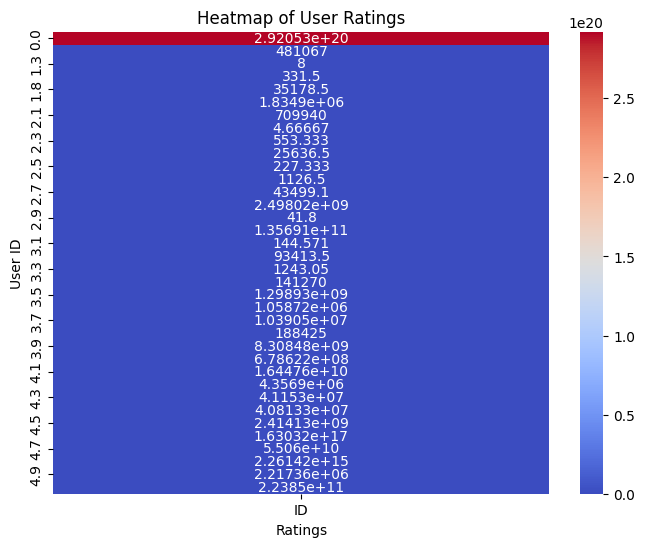

In [18]:
heatmap_data = df.pivot_table("ID", "Rating")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title("Heatmap of User Ratings")
plt.xlabel("Ratings")
plt.ylabel("User ID")
plt.show()

Text(0.5, 1.0, 'Most popular items')

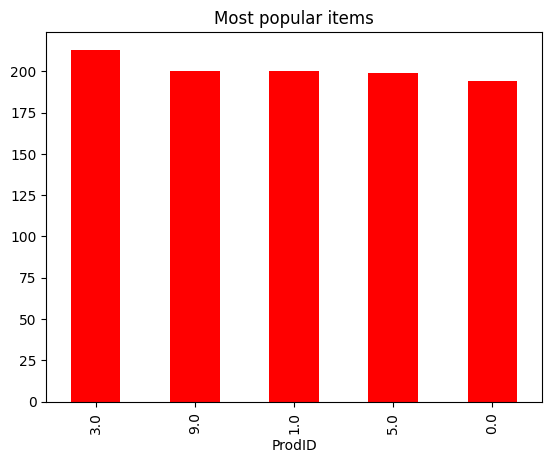

In [19]:
popular_items = df['ProdID'].value_counts().head()
popular_items.plot(kind='bar', color='red')
plt.title("Most popular items")

Text(0.5, 1.0, 'Most ratings')

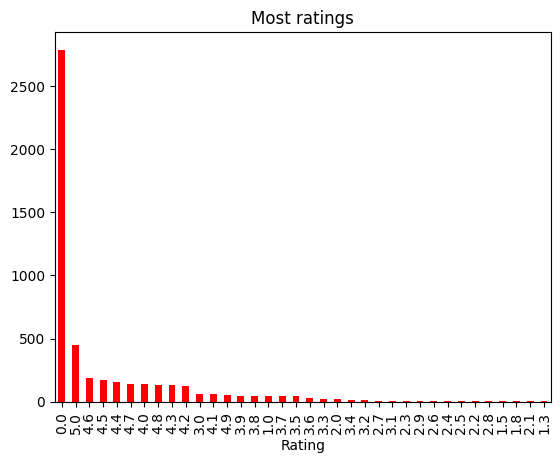

In [20]:
most_ratings = df["Rating"].value_counts()
most_ratings.plot(kind="bar", color="red")
plt.title("Most ratings")

# Data Preprocessing

In [21]:
# data cleaning and tags creation

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS and not token.is_punct]
    return ', '.join(tags)

In [22]:
columns_to_extract_tags = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags:
    df[column] = df[column].apply(preprocess)

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\655371876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(preprocess)


In [23]:
df.head()

,ID,ProdID,Category,Brand,Name,Description,Price,ImageURL,Tags,Rating,ReviewCount
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...",7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0


In [24]:
# Create New Tokens column
df["Tokens"] = df[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)
df.head()

C:\Users\mithu\AppData\Local\Temp\ipykernel_19104\1302081274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tokens"] = df[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)


,ID,ProdID,Category,Brand,Name,Description,Price,ImageURL,Tags,Rating,ReviewCount,Tokens
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...",7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0,"beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0,"seasonal, stock, essentials, personal, care, s..."


In [25]:
df["Tags"][0], df["Tokens"][0]

('OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath, Wal-mart, Walmart.com',
 'premium, beauty, premium, makeup, premium, nail, polish, care, premium, nail, polish, opi, ')

# Rating Based Recommendation System

In [26]:
df.head()

,ID,ProdID,Category,Brand,Name,Description,Price,ImageURL,Tags,Rating,ReviewCount,Tokens
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,0.0,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...","pack, 3, pack, 3, upc, 381519000201, beautiful...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,"clairol, nice, n, easy, permanent, color, give...",7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...","calling, matte, lip, lovers, indulge, rich, cr...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,0.0,"beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","1971, gillette, introduced, trac, ii, razor, s...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",0.0,131.0,"seasonal, stock, essentials, personal, care, s..."


In [27]:
average_ratings = df.groupby(["Name", "Description", "Brand", "Price", "ImageURL"])["Rating"].mean().reset_index()

In [28]:
top_rated_products = average_ratings.sort_values(by='Rating', ascending=False)

In [29]:
rating_based_recommendations = top_rated_products.head(10)
rating_based_recommendations

,Name,Description,Brand,Price,ImageURL,Rating
1580,Dove Purifying Detox Nourishing Body Wash Gree...,"dove, purifying, detox, nourishing, body, wash...",dove,5.94,https://i5.walmartimages.com/asr/9a60fb98-eefb...,5.0
2044,Goldwell StyleSign 1 Flat Marvel Straightening...,,goldwell,53.85,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
2073,"Groganics DHT Ice Oil Scalp Moisturizer, 4 oz","natural, blend, herbs, fruit, vegetables, mine...",groganics,9.99,https://i5.walmartimages.com/asr/ed63df5f-b0a6...,5.0
3794,"R+Co Aircraft Pomade Mousse, 5.6 Oz",,,28.00,https://i5.walmartimages.com/asr/03319cbe-7f61...,5.0
535,Alba Botanica Very Emollient Herbal Healing Bo...,"moisturize, nourish, sensitive, skin, alba, bo...","alba, botanica",14.99,https://i5.walmartimages.com/asr/6050a2f0-3f91...,5.0
3799,RK BY KISS Creamlicious Triple Butter Matte Cr...,"rk, kiss, creamlicious, triple, butter, matte,...","rk, kiss",2.30,https://i5.walmartimages.com/asr/6867b89c-9b2e...,5.0
1079,Candle Warmers Etc. Rustic Brown Hurricane Can...,,"candle, warmers, etc",31.83,https://i5.walmartimages.com/asr/54376245-b5c1...,5.0
2058,"Great Value Glass LED Globe, 3W, Daylight, 3 C...","illuminate, home, great, value, led, globe, bu...","great, value",5.88,https://i5.walmartimages.com/asr/164447be-edd5...,5.0
2048,"Good Sense 60-Day Air Care System, Citrus, 2 o...","convenient, air, freshener, easy, use, mainten...",diversey,62.85,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0
4651,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,"free, shipping, pack, 2, pack, 2, upc, 0115090...",vagisil,16.76,https://i5.walmartimages.com/asr/9a7992bb-cab9...,5.0


In [30]:
print("Rating Based Recommendation System: (Trending Products)")
rating_based_recommendations

Rating Based Recommendation System: (Trending Products)


,Name,Description,Brand,Price,ImageURL,Rating
1580,Dove Purifying Detox Nourishing Body Wash Gree...,"dove, purifying, detox, nourishing, body, wash...",dove,5.94,https://i5.walmartimages.com/asr/9a60fb98-eefb...,5.0
2044,Goldwell StyleSign 1 Flat Marvel Straightening...,,goldwell,53.85,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
2073,"Groganics DHT Ice Oil Scalp Moisturizer, 4 oz","natural, blend, herbs, fruit, vegetables, mine...",groganics,9.99,https://i5.walmartimages.com/asr/ed63df5f-b0a6...,5.0
3794,"R+Co Aircraft Pomade Mousse, 5.6 Oz",,,28.00,https://i5.walmartimages.com/asr/03319cbe-7f61...,5.0
535,Alba Botanica Very Emollient Herbal Healing Bo...,"moisturize, nourish, sensitive, skin, alba, bo...","alba, botanica",14.99,https://i5.walmartimages.com/asr/6050a2f0-3f91...,5.0
3799,RK BY KISS Creamlicious Triple Butter Matte Cr...,"rk, kiss, creamlicious, triple, butter, matte,...","rk, kiss",2.30,https://i5.walmartimages.com/asr/6867b89c-9b2e...,5.0
1079,Candle Warmers Etc. Rustic Brown Hurricane Can...,,"candle, warmers, etc",31.83,https://i5.walmartimages.com/asr/54376245-b5c1...,5.0
2058,"Great Value Glass LED Globe, 3W, Daylight, 3 C...","illuminate, home, great, value, led, globe, bu...","great, value",5.88,https://i5.walmartimages.com/asr/164447be-edd5...,5.0
2048,"Good Sense 60-Day Air Care System, Citrus, 2 o...","convenient, air, freshener, easy, use, mainten...",diversey,62.85,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0
4651,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,"free, shipping, pack, 2, pack, 2, upc, 0115090...",vagisil,16.76,https://i5.walmartimages.com/asr/9a7992bb-cab9...,5.0


# Content Based Recommendation System

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tf_idf_matrix_content = tfidf_vectorizer.fit_transform(df["Tokens"])
tf_idf_matrix_content

<4958x19495 sparse matrix of type '<class 'numpy.float64'>'
	with 259129 stored elements in Compressed Sparse Row format>

In [32]:
cosine_similarities_content = cosine_similarity(tf_idf_matrix_content, tf_idf_matrix_content)
cosine_similarities_content

array([[1.        , 0.00348134, 0.00363509, ..., 0.13606203, 0.31610086,
        0.05745477],
       [0.00348134, 1.        , 0.38103964, ..., 0.0231953 , 0.00185373,
        0.03804209],
       [0.00363509, 0.38103964, 1.        , ..., 0.0395961 , 0.0019356 ,
        0.05894516],
       ...,
       [0.13606203, 0.0231953 , 0.0395961 , ..., 1.        , 0.00124047,
        0.03809882],
       [0.31610086, 0.00185373, 0.0019356 , ..., 0.00124047, 1.        ,
        0.0054833 ],
       [0.05745477, 0.03804209, 0.05894516, ..., 0.03809882, 0.0054833 ,
        1.        ]])

In [33]:
cosine_similarities_content.shape

(4958, 4958)

In [34]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = df[df['Name']==item_name].index[0]
item_index

0

In [35]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))
similar_items

[(0, 1.0),
 (1, 0.0034813446358033695),
 (2, 0.00363509035938843),
 (3, 0.013253784090362382),
 (4, 0.0010141822521748797),
 (5, 0.006572191691016938),
 (6, 0.007312949488348883),
 (7, 0.051797607059271),
 (8, 0.011111435168636375),
 (9, 0.0031409990812738026),
 (10, 0.0),
 (11, 0.15941747871327505),
 (12, 0.04143625339816913),
 (13, 0.003033101508432158),
 (14, 0.0),
 (15, 0.0059767477286479555),
 (16, 0.3387164536529459),
 (17, 0.0),
 (18, 0.004568329446709325),
 (19, 0.0038804671907438117),
 (20, 0.008763293638888364),
 (21, 0.0),
 (22, 0.009442412486366685),
 (23, 0.0),
 (24, 0.0051638414665733014),
 (25, 0.0),
 (26, 0.00718771519797022),
 (27, 0.003251053428934991),
 (28, 0.28011201133677144),
 (29, 0.0),
 (30, 0.007224352589804802),
 (31, 0.006244099464954474),
 (32, 0.008756767606731896),
 (33, 0.010740150927672831),
 (34, 0.005626718574733753),
 (35, 0.010237638260010793),
 (36, 0.0020119057726893357),
 (37, 0.00327138607263772),
 (38, 0.005142686030587102),
 (39, 0.0),
 (40, 0

In [36]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indices = [x[0] for x in top_similar_items]

In [37]:
df.iloc[recommended_items_indices][["Name", "ReviewCount", "Brand"]]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [38]:
def find_best_match(df, item_name):
    preprocessed_text = preprocess(item_name)
    item_words = set(preprocessed_text.split(", "))
    
    best_match = None
    max_common_words = 0

    for token, name in zip(df["Tokens"], df["Name"]):
        token_words = set(token.split(", "))
        common_words = item_words.intersection(token_words)
        
        if len(common_words) > max_common_words:
            best_match = name
            max_common_words = len(common_words)

    if (len(item_words) >= 3 and max_common_words <= len(item_words)/3):
        return None
    return best_match

In [39]:
def content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n=10):
    if item_name not in df["Name"].values:
        best_match = find_best_match(df, item_name)
        if not best_match:
            print("Sorry, entered item is not found! You may like: ")
            return {"isFound": False, "data":rating_based_recommendations}
    else:
        best_match = item_name

    item_index = df[df["Name"]==best_match].index[0]
    similar_items = cosine_similarities_content[item_index]
    similar_items = list(enumerate(similar_items))
    similar_items = sorted(similar_items, key=lambda x : x[1], reverse=True)

    top_similar_items = similar_items[0:top_n+1]
    top_similar_items_indices = [x[0] for x in top_similar_items]
    return {"isFound":True, "data":df.iloc[top_similar_items_indices][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]]}

In [40]:
# Example
item_name = 'lipstick'
content_based_rec = content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n=8)
content_based_rec

{'isFound': True,
 'data':                                                    Name  \
 3     Kokie Professional Matte Lipstick, Hot Berry, ...   
 3406  Kokie Professional Matte Lipstick, Firecracker...   
 546   Kokie Professional Matte Lipstick, Kiss Me, 0....   
 2406           L.A. Colors Matte Lipstick, Tender Matte   
 4050  Kokie Professional Lip Poudre Liquid Matte Liq...   
 1559  LOreal Paris Colour Riche Matte Lip Liner, Mat...   
 2873  Kokie Professional Lip Poudre Liquid Matte Liq...   
 3023                           Be Matte Lipstick - Pink   
 4541                      Be Matte Lipstick - Soft Pink   
 
                                             Description             Brand  \
 3     calling, matte, lip, lovers, indulge, rich, cr...  kokie, cosmetics   
 3406  calling, matte, lip, lovers, indulge, rich, cr...  kokie, cosmetics   
 546   kokie, professional, sienna, matte, lipstick, ...  kokie, cosmetics   
 2406  matte, color, colors, matte, lipstick, covered...    

# Collaborative Filtering

In [41]:
user_item_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,1,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,2,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
user_similarity = cosine_similarity(user_item_matrix)

In [43]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [44]:
user_similarities = user_similarity[target_user_index]
user_similarities

array([0.06575602, 0.0920999 , 0.04336465, ..., 0.        , 0.03691067,
       0.        ])

In [45]:
similar_user_indices = user_similarities.argsort()[::-1]
similar_user_indices

array([   4,   84, 1545, ..., 1098, 1099,  855], dtype=int64)

In [46]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_item_details = df[df['ProdID'].isin(recommend_items)][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]]

In [47]:
recommended_item_details

,Name,Description,Brand,Price,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,"discover, natural, way, shine, 80, naturally, ...",clairol,6.99,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...","dentek, fun, flossers, kids, custom, help, kid...",dentek,8.99,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...","classic, colorlicious, lipstick, bigger, bette...",covergirl,9.85,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,"create, natural, breathable, look, feel, neutr...",neutrogena,11.14,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,"natural, coconut, monoi, curl, enhancing, dual...","design, essentials",10.95,https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
...,...,...,...,...,...,...
4983,Covidien Simplicity Underpad - 7136CS - 23&quo...,"covidien, simplicity, underpad, 7136cs, x, 200...",covidien,29.26,https://i5.walmartimages.com/asr/2b5ce91e-7b16...,0.0
4987,2oz - Artizen Breathe Blend Essential Oil (100...,"100, pure, breathe, blend, essential, oil, art...",artizen,16.99,https://i5.walmartimages.com/asr/99ddd317-013e...,5.0
4990,2 Pack - Crest 3D White Brilliance Fluoride An...,"pack, 2, upc, 037000943822, product, descripti...",crest,19.96,https://i5.walmartimages.com/asr/5758fbaf-5515...,4.7
4996,Garnier Nutrisse Nourishing Hair Color Creme (...,"garnier, nutrisse, nourishing, hair, color, cr...",garnier,4.44,https://i5.walmartimages.com/asr/24d7a837-51f8...,3.9


In [48]:
def collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10):
    # Find the index of the target user
    try:
        target_user_index = user_item_matrix.index.get_loc(target_user_id)
    except:
        print("User record not found. You may like: ")
        return {"isFound":False, "data":rating_based_recommendations}
    
    # Get similarity scores for the target user
    user_similarities = user_similarity[target_user_index]
    
    # Get indices of similar users, sorted by similarity (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]
    
    recommended_items = []
    recommended_item_details = []
    
    for user_index in similar_user_indices:
        if len(recommended_items) >= top_n:
            break
        
        # Get the ratings of the similar user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        
        # Get items not rated by the target user
        not_rated_by_target_user = (user_item_matrix.iloc[target_user_index] == 0)
        
        # Get items rated by similar user and not by target user
        potential_recommendations = rated_by_similar_user[not_rated_by_target_user & (rated_by_similar_user > 0)]
        
        # Add the potential recommendations to the list
        for item in potential_recommendations.index:
            if len(recommended_items) < top_n and item not in recommended_items:
                recommended_items.append(item)
                
                # Get item details
                item_details = df[df["ProdID"] == item][["Name", "Description", "Brand", "Price", "ImageURL", "Rating"]].drop_duplicates().iloc[0]
                recommended_item_details.append(item_details)
    
    # Convert the recommended item details to a DataFrame
    recommended_item_details_df = pd.DataFrame(recommended_item_details).head(top_n)
    
    return {"isFound":True, "data":recommended_item_details_df}

In [49]:
# example
target_user_id = 100
top_n = 10
collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 10 recommendations for User 100:


{'isFound': True,
 'data':                                                    Name  \
 1610  Kiss My Face Babys First Kiss SPF 50 Broad Spe...   
 3919                          GiGi All Purpose Wax 14oz   
 3     Kokie Professional Matte Lipstick, Hot Berry, ...   
 375   OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...   
 15    Clairol Natural Instincts Demi-Permanent Hair ...   
 109   COVERGIRL TruNaked Eyeshadow Palette, 845 Sunsets   
 487         SheaMoisture Bar Soap Raw Shea Butter, 8 oz   
 1724        e.l.f. Eyeliner & Shadow Stick, Black/Smoke   
 191   Schick Injector Blades Mens Razor Blade Refill...   
 7     BMC Bright and Loud Cream Gel Lacquer Polish S...   
 
                                             Description             Brand  \
 1610  practice, safe, sun, precious, babys, skin, ki...        kiss, face   
 3919  purpose, wax, leaves, skin, sleek, smooth, fre...              gigi   
 3     calling, matte, lip, lovers, indulge, rich, cr...  kokie, cosmetics   


# Hybrid based recommendations

In [50]:
def hybrid_recommendations(df, target_user_id, item_name,  cosine_similarities_content, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10):
    content_based_rec = content_based_recommendations(df, item_name, cosine_similarities_content, rating_based_recommendations, top_n)
    
    collaborative_filtering_rec = collaborative_filtering_recommendations(df, target_user_id, user_item_matrix, user_similarity, rating_based_recommendations, top_n)
    
    if content_based_rec['isFound'] and collaborative_filtering_rec['isFound']:
        hybrid_rec = pd.concat([content_based_rec['data'], collaborative_filtering_rec['data']]).drop_duplicates()
        return {"isFound":True, 'data':hybrid_rec.head(10)}
    elif content_based_rec['isFound']:
        return {"isFound":True, 'data':content_based_rec['data']}
    elif collaborative_filtering_rec['isFound']:
        return {"isFound":True, 'data':collaborative_filtering_rec['data']}
    else:
        return {"isFound":False, "data":rating_based_recommendations}

In [51]:
# Example
target_user_id = 4
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
hybrid_rec = hybrid_recommendations(df, target_user_id, item_name,  cosine_similarities_content, user_item_matrix, user_similarity, rating_based_recommendations, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath':


{'isFound': True,
 'data':                                                   Name Description Brand  \
 0    OPI Infinite Shine, Nail Lacquer Nail Polish, ...               opi   
 156  OPI Nail Lacquer Polish .5oz/15mL - This Gown ...               opi   
 184  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...               opi   
 205  OPI Nail Lacquer - Dont Bossa Nova Me Around -...               opi   
 237  OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...               opi   
 325  OPI Gel Polish Fall 2019 Scotland Collection G...               opi   
 375  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...               opi   
 402   OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz               opi   
 706  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...               opi   
 886  OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...               opi   
 
      Price                                           ImageURL  Rating  
 0     8.95  https://i5.walmartimages.com/asr/0e1f4c

In [69]:
user_ids = df["ID"].unique()
user_ids

array([1.70573679e+09, 9.50000000e+01, 8.00000000e+00, ...,
       3.38063000e+05, 4.49000000e+02, 2.77100000e+03])

In [73]:
import pickle


data = {
    'top_rated_products': top_rated_products,
    'user_ids': user_ids,
    'df': df,
    'cosine_similarities_content': cosine_similarities_content,
    'user_item_matrix': user_item_matrix,
    'user_similarity': user_similarity,
    'rating_based_recommendations':  rating_based_recommendations
}

with open("data.pkl", "wb") as f:
    pickle.dump(data, f)